In [2]:
# Python 2
#from sklearn.externals import joblib
# Python 3
import joblib

from PIL import Image, ImageDraw
from io import BytesIO
import json
import joblib
import os
import random

import numpy as np
import matplotlib.pyplot as plt

random.seed(25)

COCO_IMAGE_PATH = '/data4/coco2014/images/'
COCO_ATTRIBUTE_PATH = './cocottributes_py3.jbl'
COCO_ANNOTATION_PATH = '/data4/coco2014/annotations/'

In [3]:
cocottributes = joblib.load(COCO_ATTRIBUTE_PATH)

In [4]:
def load_coco(root_path=COCO_ANNOTATION_PATH):
    # Load COCO Annotations in val2014 & train2014
    coco_data = {'images':[], 'annotations':[]}
    with open(os.path.join(root_path, 'instances_train2014.json'), 'r') as f:
        train2014 = json.load(f)
    with open(os.path.join(root_path, 'instances_val2014.json'), 'r') as f:
        val2014 = json.load(f)
    coco_data['categories'] = train2014['categories']
    coco_data['images'] += train2014['images']
    coco_data['images'] += val2014['images']
    coco_data['annotations'] += train2014['annotations']
    coco_data['annotations'] += val2014['annotations']
    return coco_data

In [5]:
def id_to_path(data_path=COCO_IMAGE_PATH):
    id2path = {}
    splits = ['train2014', 'val2014']
    for split in splits:
        for file in os.listdir(os.path.join(data_path, split)):
            if file.endswith(".jpg"):
                idx = int(file.split('.')[0].split('_')[-1])
                id2path[idx] = os.path.join(data_path, split, file)
    return id2path

In [6]:
def print_coco_attributes_instance(cocottributes, coco_data, id2path, ex_ind, sname):
    # List of COCO Attributes
    attr_details = sorted(cocottributes['attributes'], key=lambda x:x['id'])
    attr_names = [item['name'] for item in attr_details]

    # COCO Attributes instance ID for this example
    coco_attr_id = list(cocottributes['ann_vecs'].keys())[ex_ind]

    # COCO Attribute annotation vector, attributes in order sorted by dataset ID
    instance_attrs = cocottributes['ann_vecs'][coco_attr_id]

    # Print the image and positive attributes for this instance, attribute considered postive if worker vote is > 0.5
    pos_attrs = [a for ind, a in enumerate(attr_names) if instance_attrs[ind] > 0.5]
    coco_dataset_ann_id = cocottributes['patch_id_to_ann_id'][coco_attr_id]

    coco_annotation = [ann for ann in coco_data['annotations'] if ann['id'] == coco_dataset_ann_id][0]

    img_path = id2path[coco_annotation['image_id']]
    img = Image.open(img_path)
    polygon = coco_annotation['segmentation'][0]
    bbox = coco_annotation['bbox']
    ImageDraw.Draw(img, 'RGBA').polygon(polygon, outline=(255,0,0), fill=(255,0,0,50))
    ImageDraw.Draw(img, 'RGBA').rectangle(((bbox[0], bbox[1]), (bbox[0]+bbox[2], bbox[1]+bbox[3])), outline="red")
    img = img.crop((bbox[0], bbox[1], bbox[0]+bbox[2], bbox[1]+bbox[3]))
    img = np.array(img)
    category = [c['name'] for c in coco_data['categories'] if c['id'] == coco_annotation['category_id']][0]

    print_image_with_attributes(img, pos_attrs, category, sname)

In [7]:
def print_image_with_attributes(img, attrs, category, sname):

    fig = plt.figure()
    plt.imshow(img)
    plt.axis('off')  # clear x- and y-axes
    plt.title(category)
    for ind, a in enumerate(attrs):
        plt.text(min(img.shape[1]+10, 1000), (ind+1)*img.shape[1]*0.1, a, ha='left')
    
    #fig.savefig(sname, dpi = 300,  bbox_inches='tight')    

In [8]:
coco_data = load_coco()
id2path = id_to_path()

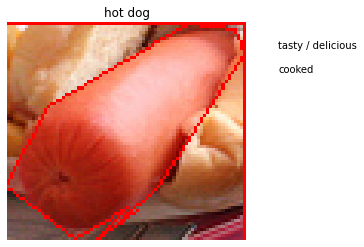

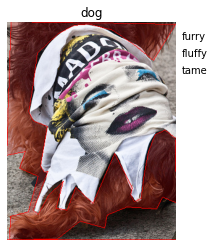

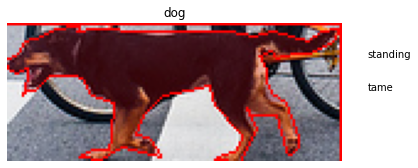

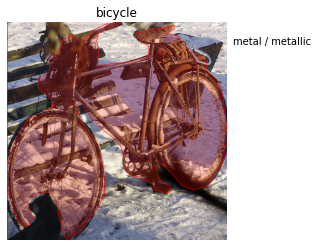

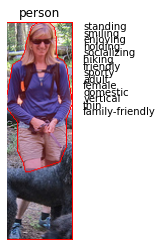

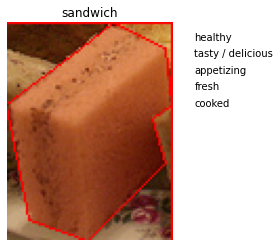

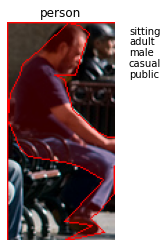

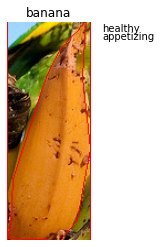

In [9]:
ex_inds = [0,10,50,1000,2000,3000,4000,5000]
sname = '/Users/tangkaihua/Desktop/example_cocottributes_annotation{}.jpg'
for ex_ind in ex_inds:
    print_coco_attributes_instance(cocottributes, coco_data, id2path, ex_ind, sname.format(ex_ind))